In [1]:
import sys
import numpy as np
#import logging
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataset as dataset
import snelib19odp.lc.observables as observables

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
#logging.basicConfig(level=logging.DEBUG)
import seaborn
import astropy.time as time
import tqdm

In [2]:
sn2008d = dataset.load_dataset('SN2008D')
sn2019odp = dataset.load_dataset('SN2019odp_phot')
ptf13bvn = dataset.load_dataset('iPTF13bvn')

       mjd         band   mag   mag_err  maglim telescope instrument
------------------ ---- ------- ------- ------- --------- ----------
58718.171532724984 UVW1 21.1707  0.3498 21.2422     Swift       UVOT
 58718.17296719598    U 20.4926  0.3356 20.6174     Swift       UVOT
58718.173944388516    B 18.9096  0.1832 19.9058     Swift       UVOT
 58718.17632610677 UVW2 22.8054  0.5947 22.0495     Swift       UVOT
 58718.17869199114    V 18.5903  0.2777  18.981     Swift       UVOT
 58718.18644587137 UVM2 22.4146  0.2873 22.7858     Swift       UVOT
58719.476249458734 UVW1 21.2914  0.2713 21.7586     Swift       UVOT
 58719.47768546175    U 20.6638  0.2699  21.086     Swift       UVOT
58719.478660993744    B 18.7056  0.1176 20.3376     Swift       UVOT
 58719.48103849823 UVW2 22.2051  0.3022 22.5072     Swift       UVOT
               ...  ...     ...     ...     ...       ...        ...
 58721.96560227778    U 19.6001  0.1871 20.6589     Swift       UVOT
 58721.96663642116    B 18.0553  0

../lib/snelib19odp/dataset.py:483: RuntimeWarning: invalid value encountered in log10
  ds['mag'] = -2.5*np.log10(ds['ampl']) + ds['magzp']


100%|██████████| 1000/1000 [00:39<00:00, 25.48it/s]


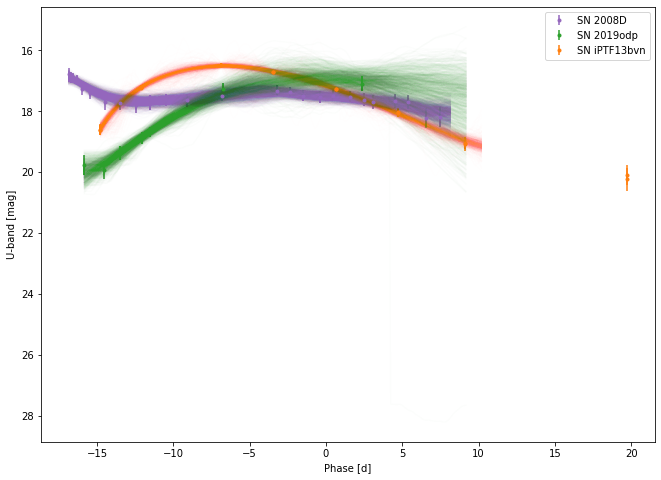

In [7]:
# plot U
plt.figure(figsize=(11,8))
t_grid_08d = sn2008d.first_detection_mjd_band('U') + np.linspace(0, 25, 300)
t_grid_19odp = sn2019odp.first_detection_mjd_band('u') + np.linspace(0, 25, 300)
t_grid_13bvn = ptf13bvn.first_detection_mjd_band('U') + np.linspace(0, 25, 300)

for i in tqdm.tqdm(range(1000)):
    u = sn2008d.get_interpolated('U', t_grid=t_grid_08d, parametric=False, sample='random')
    idx = np.abs(u) < 30
    #r = sn2008d.get_interpolated('r', t_grid=t_grid, parametric=False, sample='random')
    plt.plot((t_grid_08d - sn2008d.transient.prior_t0)[idx], u[idx], alpha=0.01, color='tab:purple')
    
    u = sn2019odp.get_interpolated('u', t_grid=t_grid_19odp, parametric=False, sample='random')
    idx = np.abs(u) < 30
    plt.plot((t_grid_19odp - sn2019odp.transient.prior_t0)[idx], u[idx], alpha=0.01, color='tab:green')
    
    u = ptf13bvn.get_interpolated('U', t_grid=t_grid_13bvn, parametric=False, sample='random')
    idx = np.abs(u) < 30
    plt.plot((t_grid_13bvn - ptf13bvn.transient.prior_t0)[idx], u[idx], alpha=0.005, color='tab:orange')

lc = sn2008d.get_interpolator('U').get_corrected_obs_dataset()
plt.errorbar(lc['mjd'] - sn2008d.transient.prior_t0, lc['mag'], yerr=lc['mag_err'], ls='', fmt='.', color='tab:purple', label='SN 2008D')

lc = sn2019odp.get_interpolator('u').get_corrected_obs_dataset()
plt.errorbar(lc['mjd'] - sn2019odp.transient.prior_t0, lc['mag'], yerr=lc['mag_err'], ls='', fmt='.', color='tab:green', label='SN 2019odp')

lc = ptf13bvn.get_interpolator('U').get_corrected_obs_dataset()
plt.errorbar(lc['mjd'] - ptf13bvn.transient.prior_t0, lc['mag'], yerr=lc['mag_err'], ls='', fmt='.', color='tab:orange', label='SN iPTF13bvn')
plt.legend()
plt.gca().invert_yaxis()
plt.ylabel('U-band [mag]')
plt.xlabel('Phase [d]')
plt.savefig('../paper/plots/tmp_playground/sn2008d_uv_lc_u.png')

In [4]:
sn2008d.combined_ds[sn2008d.combined_ds['band'] ==  'U']

<Table length=25>
   mjd     band instrument ...        absmag        mag_err_correlated
 float64   str4   object   ...       float64             float64      
---------- ---- ---------- ... ------------------- -------------------
54476.1478    U       UVOT ... -13.269505054905604 0.45858223433985207
54476.2761    U       UVOT ... -13.144505054905604  0.4571885547735816
54476.4338    U       UVOT ... -13.157505054905602 0.45614418474717344
54476.7026    U       UVOT ... -13.100505054905604 0.45678062877081066
54477.0122    U       UVOT ... -12.772505054905604 0.45845517804832364
54477.5505    U       UVOT ... -12.635505054905604  0.4641057295145043
54478.5181    U       UVOT ... -12.325505054905602 0.44507174510624475
54479.5205    U       UVOT ... -12.317505054905602  0.4484865463407303
54480.5248    U       UVOT ... -12.245505054905603 0.44596741847767846
 54481.499    U       UVOT ... -12.312505054905603  0.4679751873701637
       ...  ...        ... ...                 ...                 ...
54491.5039    U       UVOT ... -12.547505054905603 0.45406103024212424
54492.6395    U       UVOT ... -12.510505054905604 0.46615728202609935
54493.4386    U       UVOT ... -12.553505054905603 0.47716343298724423
 54494.544    U       UVOT ... -12.520505054905602 0.46455213089549247
 54495.516    U       UVOT ... -12.417505054905604 0.46263611997559373
54496.1141    U       UVOT ... -12.352505054905603  0.4738772635398661
54497.5289    U       UVOT ... -12.371505054905604  0.4768064326480082
54498.3927    U       UVOT ... -12.334505054905602  0.4433553747244289
54499.5304    U       UVOT ... -11.825505054905602 0.45388863910804406
54500.4659    U       UVOT ... -11.854505054905601 0.45726644975880215

In [5]:
sn2008d.combined_ds[sn2008d.combined_ds['band'] ==  'r']

<Table length=44>
    mjd     band instrument ...        absmag        mag_err_correlated
  float64   str4   object   ...       float64             float64      
----------- ---- ---------- ... ------------------- -------------------
  54475.408    r       None ... -14.323505054905603 0.27640047920225963
54476.43472    r       None ... -14.538505054905603 0.28234983695481414
54477.26301    r       None ... -14.512505054905603  0.2875895038956604
54477.45935    r       None ... -14.471505054905602 0.27787691370856094
54478.29949    r       None ... -14.485505054905602  0.2679866405311656
54478.48174    r       None ... -14.458505054905604 0.27505774766868213
54480.39146    r       None ... -14.623505054905603  0.2735421072679923
54481.50896    r       None ... -14.893505054905603 0.28027219546499405
54482.41694    r       None ... -15.051505054905604  0.2687753103192527
54482.43498    r       None ... -14.967505054905601  0.2804674881559521
        ...  ...        ... ...                 ...                 ...
54553.12764    r       None ... -13.788505054905603  0.2715094672853127
 54558.1034    r       None ... -13.666505054905603 0.28033903519416314
54572.16715    r       None ... -13.367505054905603  0.2703377722291734
54575.24338    r       None ... -13.402505054905603  0.2633450074228133
54579.12469    r       None ... -13.304505054905604 0.27276317097463404
 54583.1405    r       None ... -13.202505054905604 0.28429236759377136
54585.16881    r       None ... -13.221505054905602  0.2810062741178324
 54590.1659    r       None ... -13.086505054905604  0.2694754853160577
54594.15625    r       None ... -13.000505054905602 0.27425369706722486
54615.14566    r       None ... -12.594505054905603 0.27606051714840135

100%|██████████| 2000/2000 [02:32<00:00, 13.14it/s]
No handles with labels found to put in legend.


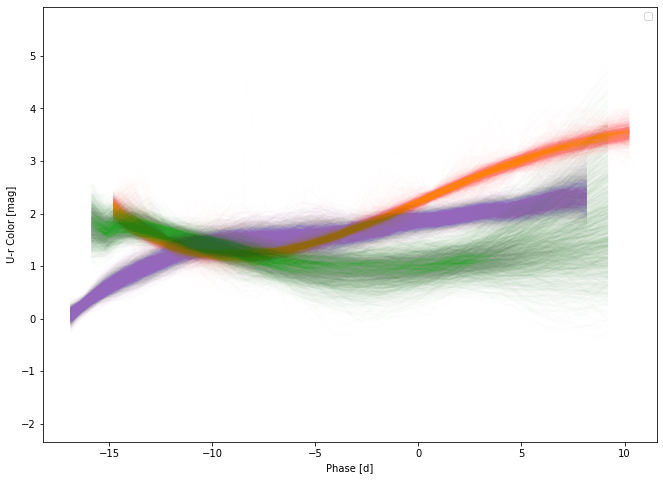

In [6]:
# plot U-r
plt.figure(figsize=(11,8))
t_grid_08d = sn2008d.first_detection_mjd_band('U') + np.linspace(0, 25, 300)
t_grid_19odp = sn2019odp.first_detection_mjd_band('u') + np.linspace(0, 25, 300)
t_grid_13bvn = ptf13bvn.first_detection_mjd_band('U') + np.linspace(0, 25, 300)

for i in tqdm.tqdm(range(2000)):
    u = sn2008d.get_interpolated('U', t_grid=t_grid_08d, parametric=False, sample='random')
    r = sn2008d.get_interpolated('r', t_grid=t_grid_08d, parametric=False, sample='random')
    plt.plot(t_grid_08d - sn2008d.transient.prior_t0, u-r, alpha=2/255, color='tab:purple')
    
    u = sn2019odp.get_interpolated('u', t_grid=t_grid_19odp, parametric=False, sample='random')
    r = sn2019odp.get_interpolated('r', t_grid=t_grid_19odp, parametric=False, sample='random')
    plt.plot(t_grid_19odp - sn2019odp.transient.prior_t0, u-r, alpha=2/255, color='tab:green')
    
    u = ptf13bvn.get_interpolated('U', t_grid=t_grid_13bvn, parametric=False, sample='random')
    r = ptf13bvn.get_interpolated('r', t_grid=t_grid_13bvn, parametric=False, sample='random')
    idx = np.abs(u-r) < 4
    plt.plot(t_grid_13bvn[idx] - ptf13bvn.transient.prior_t0, (u-r)[idx], alpha=1/255, color='tab:orange')
    

lc = sn2008d.get_interpolator('U').get_corrected_obs_dataset()
#plt.errorbar(lc['mjd'] - sn2008d.transient.prior_t0, lc['mag'], yerr=lc['mag_err'], ls='', fmt='.', color='tab:purple', label='SN 2008D')

lc = sn2019odp.get_interpolator('u').get_corrected_obs_dataset()
#plt.errorbar(lc['mjd'] - sn2019odp.transient.prior_t0, lc['mag'], yerr=lc['mag_err'], ls='', fmt='.', color='tab:green', label='SN 2019odp')
plt.legend()
#plt.gca().invert_yaxis()
plt.ylabel('U-r Color [mag]')
plt.xlabel('Phase [d]')
plt.savefig('../paper/plots/tmp_playground/sn2008d_uv_lc_ur.png')